<a href="https://colab.research.google.com/github/Hiji1023/mini_project/blob/main/pima_diabetes_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn._config import get_config, set_config

# default setting
get_config()["print_changed_only"]

True

In [2]:
# now changing it
set_config(print_changed_only = False)

##필요한 라이브러리 로드

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boostcourse/data/diabetes_feature.csv')
df.shape

(768, 16)

## 데이터셋 만들기

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [7]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [8]:
y = df['Outcome']
y.shape

(768,)

In [9]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [11]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 여러 알고리즘 사용해 비교하기

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)
              ]
estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=42, verbose=0, warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='l

In [16]:
max_depth = np.random.randint(2, 20, 10)
max_depth


array([17,  3, 15, 19,  8,  7, 13, 17, 15, 18])

In [18]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features


array([0.95987709, 0.97162693, 0.36793496, 0.43872748, 0.4258569 ,
       0.65032948, 0.58248319, 0.83815023, 0.54597068, 0.76720928])

In [22]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_distribution = {"max_depth" : max_depth,
                      "max_features" : max_features}
results = []
for estimator in estimators:
    result = []
    clf = RandomizedSearchCV(estimator,
                   param_distributions = param_distribution,
                   n_iter = 10,
                   scoring = "accuracy",
                   n_jobs = -1,
                   cv = 5,
                   verbose=2
                   )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [30]:
df = pd.DataFrame(results, columns=["estimator", "best_params_", "train_score_", "test_score","cv_results_"])

In [33]:
pd.DataFrame(df.loc[1,"cv_results_"]).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.351421,0.006002,0.015529,0.001633,0.582483,13,"{'max_features': 0.5824831899230932, 'max_dept...",0.886179,0.934959,0.853659,0.886179,0.942623,0.900720,0.033364,1
9,0.407052,0.073846,0.014757,0.002278,0.582483,17,"{'max_features': 0.5824831899230932, 'max_dept...",0.886179,0.934959,0.853659,0.886179,0.942623,0.900720,0.033364,1
5,0.351097,0.011816,0.013865,0.000465,0.767209,19,"{'max_features': 0.7672092849168525, 'max_dept...",0.869919,0.934959,0.853659,0.910569,0.934426,0.900706,0.033373,3
6,0.338558,0.004600,0.014941,0.001319,0.650329,7,"{'max_features': 0.6503294816892667, 'max_dept...",0.886179,0.934959,0.861789,0.886179,0.934426,0.900706,0.029144,3
7,0.312343,0.004815,0.015767,0.001694,0.438727,18,"{'max_features': 0.4387274792623922, 'max_dept...",0.886179,0.926829,0.861789,0.894309,0.934426,0.900706,0.026781,3
8,0.325150,0.010779,0.015880,0.001815,0.367935,15,"{'max_features': 0.3679349565068508, 'max_dept...",0.886179,0.926829,0.861789,0.894309,0.934426,0.900706,0.026781,3
4,0.375153,0.005147,0.014402,0.000126,0.959877,7,"{'max_features': 0.9598770947776458, 'max_dept...",0.869919,0.943089,0.861789,0.902439,0.926230,0.900693,0.031347,7
0,0.360044,0.013186,0.019013,0.005427,0.545971,13,"{'max_features': 0.5459706837106288, 'max_dept...",0.878049,0.943089,0.861789,0.894309,0.909836,0.897414,0.027908,8
2,0.400205,0.010027,0.014654,0.001012,0.971627,18,"{'max_features': 0.9716269252262599, 'max_dept...",0.869919,0.951220,0.853659,0.886179,0.901639,0.892523,0.033437,9
1,0.348189,0.009212,0.014213,0.001082,0.971627,3,"{'max_features': 0.9716269252262599, 'max_dept...",0.845528,0.910569,0.829268,0.853659,0.942623,0.876329,0.042999,10


## 학습, 예측하기

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model.feature_importances_

array([0.09820631, 0.04628904, 0.09942072, 0.03291853, 0.05408423,
       0.1020376 , 0.00746545, 0.55957812, 0.        ])

In [ ]:
feature_names = X_train.columns.tolist()

<Axes: >

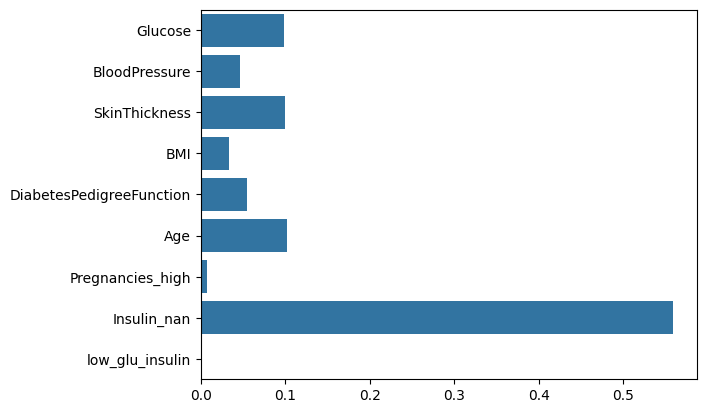

In [ ]:
sns.barplot(x = model.feature_importances_, y =feature_names)

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

## 정확도 측정

In [ ]:
# DT : 28
# RF : 20
# GB : 24
(y_predict != y_test).sum()

27

In [ ]:
# DT : 0.818
# RF : 0.870
# GB : 0.844
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8246753246753247